Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

![Clean Data](../../img/clean_data.png)

In [47]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Clean continuous variables

######Fill missing for Age

In [49]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
titanic["Age"].fillna(titanic['Age'].mean(), inplace = True)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


#### Combine `SibSp` & `Parch`

###### SibSp - no of siblings and Spouses
###### Parch - no of Parents and children

<Figure size 432x288 with 0 Axes>

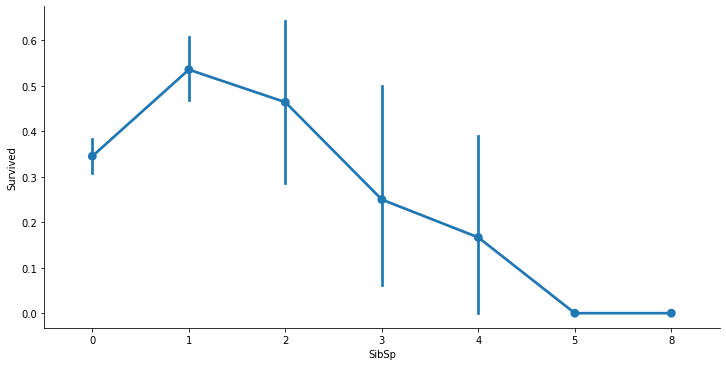

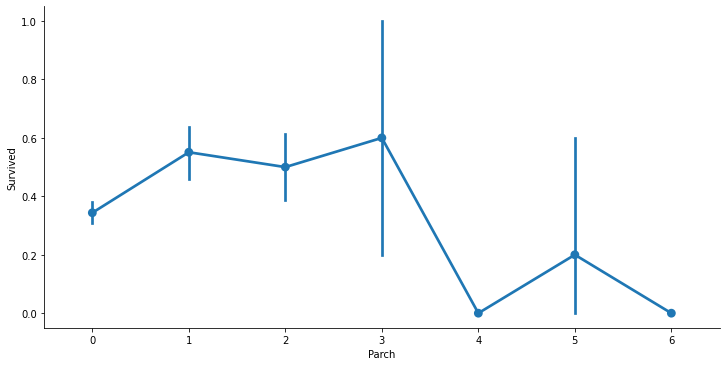

In [51]:
#lets understand that More number of SibSp less chances of survival
#Higher the line lower the data available

for i, col in enumerate(['SibSp', 'Parch']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=titanic, kind = 'point', aspect=2,)

In [52]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

####Drop unnecessary variables

In [53]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [54]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### Clean categorical variables

###### Fill in missing and create indicator for 'Cabin'

In [55]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [56]:
#Check the number of NaN values and there relation with survival. if these number is not in big then we have to drop 

titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [57]:
titanic["Cabin_ind"] = np.where(titanic["Cabin"].isnull(), 0,1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


#####Convert SEX to numeric


In [58]:
gender_num = {'male': 0, 'female' : 1}

titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


#### Drop unnecessary variables

In [59]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [60]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


### Write out cleaned data

In [61]:
titanic.to_csv('../../../titanic_cleaned.csv', index=False)

######Read Clean Data

In [62]:
from sklearn.model_selection import train_test_split

features = titanic.drop("Survived", axis = 1)
labels = titanic['Survived']

In [63]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)
X_val,X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [64]:
for dataset in [y_train, y_val, y_test]:
  print(round(len(dataset)/len(labels), 2))

0.6
0.2
0.2


#Logistic Regression : Hyperprameters

Where
C = Hyperparameter
Random state - Helps to select same data on each run

C Hyperparameter - its a regularization parameter in logistic regression that controls how closely the model to the training data.

Regularization - its a technique used to reduce overfitting by discouraging overly complex models in some way.

In [66]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
import joblib #To pickle the best model we get
from sklearn.model_selection import GridSearchCV #CrossValidation
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

tr_features = X_train
tr_labels = y_train

Hyperparameter tuning

In [68]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

Using Cross-fold validation

In [70]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cvlog = GridSearchCV(lr, parameters, cv=5)
cvlog.fit(tr_features, tr_labels.values.ravel())

print_results(cvlog)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


BEST PARAMS: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


In [71]:
cvlog.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Write out pickled model

In [72]:
joblib.dump(cvlog.best_estimator_, '../../../LR_model.pkl')

['../../../LR_model.pkl']

#Support Vector Machine

In [73]:
from sklearn.svm import SVC

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [74]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cvsvm = GridSearchCV(svc, parameters, cv=5)
cvsvm.fit(tr_features, tr_labels.values.ravel())

print_results(cvsvm)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


### Write out pickled model

In [75]:
joblib.dump(cvsvm.best_estimator_, '../../../SVM_model.pkl')

['../../../SVM_model.pkl']

## Multilayer Perceptron: Fit and evaluate a model

In [76]:
from sklearn.neural_network import MLPClassifier

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [77]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)], #(Number of nodes, number of layers)
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'] 
    #constant - keep the same learning rate for entire process
    #invscaling - INVERT SCALING - Gradually decreses the LR in each step
    #adaptive - keep the same LR as long as training loss keeps decreasing, once the training loss increses then it will decrease LR
}

cvmlp = GridSearchCV(mlp, parameters, cv=5)
cvmlp.fit(tr_features, tr_labels.values.ravel())

print_results(cvmlp)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.76 (+/-0.103) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.742 (+/-0.077) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.734 (+/-0.149) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.777 (+/-0.124) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.774 (+/-0.126) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.77 (+/-0.14) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.8 (+/-0.12) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.783 (+/-0.092) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.779 (+/-0.08) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [78]:
#print best hyperparameters
cvmlp.best_estimator_

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Write out pickled model

In [79]:
joblib.dump(cvmlp.best_estimator_, '../../../MLP_model.pkl')

['../../../MLP_model.pkl']

## Random Forest: Fit and evaluate a model

In [80]:
from sklearn.ensemble import RandomForestClassifier

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [81]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250], #No of Decision trees
    'max_depth': [2, 4, 8, 16, 32, None] # Depth of each Decision tree
}

cvrf = GridSearchCV(rf, parameters, cv=5)
cvrf.fit(tr_features, tr_labels.values.ravel())

print_results(cvrf)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}

0.807 (+/-0.109) for {'max_depth': 2, 'n_estimators': 5}
0.785 (+/-0.126) for {'max_depth': 2, 'n_estimators': 50}
0.802 (+/-0.105) for {'max_depth': 2, 'n_estimators': 250}
0.807 (+/-0.098) for {'max_depth': 4, 'n_estimators': 5}
0.824 (+/-0.123) for {'max_depth': 4, 'n_estimators': 50}
0.826 (+/-0.109) for {'max_depth': 4, 'n_estimators': 250}
0.813 (+/-0.052) for {'max_depth': 8, 'n_estimators': 5}
0.822 (+/-0.078) for {'max_depth': 8, 'n_estimators': 50}
0.815 (+/-0.067) for {'max_depth': 8, 'n_estimators': 250}
0.794 (+/-0.062) for {'max_depth': 16, 'n_estimators': 5}
0.805 (+/-0.021) for {'max_depth': 16, 'n_estimators': 50}
0.816 (+/-0.022) for {'max_depth': 16, 'n_estimators': 250}
0.805 (+/-0.036) for {'max_depth': 32, 'n_estimators': 5}
0.803 (+/-0.061) for {'max_depth': 32, 'n_estimators': 50}
0.813 (+/-0.031) for {'max_depth': 32, 'n_estimators': 250}
0.811 (+/-0.021) for {'max_depth': None, 'n_estimators': 5}
0.803 (+/-0.

### Write out pickled model

In [82]:
joblib.dump(cvrf.best_estimator_, '../../../RF_model.pkl')

['../../../RF_model.pkl']

## Boosting: Fit and evaluate a model

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [84]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cvboo = GridSearchCV(gb, parameters, cv=5)
cvboo.fit(tr_features, tr_labels.values.ravel())

print_results(cvboo)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.117) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.841 (+/-0.077) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.822 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.818 (+/-0.043) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.82 (+/-0.036) for {'learning_ra

### Write out pickled model

In [85]:
joblib.dump(cvboo.best_estimator_, '../../../GB_model.pkl')

['../../../GB_model.pkl']

## Summary: Compare model results and final model selection

In this section, we will do the following:
1. Evaluate all of our saved models on the validation set
2. Select the best model based on performance on the validation set
3. Evaluate that model on the holdout test set

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = X_val
val_labels = y_val

te_features = X_test
te_labels = y_test

In [92]:
#Read Model
models = {"LR": cvlog.best_estimator_, "SVM":cvsvm.best_estimator_, "MLP": cvmlp.best_estimator_, "RF":cvrf.best_estimator_, "GB":cvrf.best_estimator_}
models

{'GB': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=4, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=250,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'LR': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'MLP': MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
               beta_1=0.9, 

### Evaluate models on the validation set

In [99]:
def evaluate_model(name,model,features,labels):
  start = time() #Helps to calcluate time taken for prediction
  pred = model.predict(features)
  end = time()
  accuracy = round(accuracy_score(labels, pred),3)
  precision = round(precision_score(labels, pred),3)
  recall = round(recall_score(labels, pred),3)
  print('{} -- Accuracy: {}/Precision : {}/ Recall: {}/ Latency: {}ms'.format(name,accuracy,precision,recall,round((end - start)*1000, 1)))

In [101]:
for name, mdl in models.items():
  evaluate_model(name,mdl,val_features, val_labels)

LR -- Accuracy: 0.775/Precision : 0.712/ Recall: 0.646/ Latency: 2.3ms
SVM -- Accuracy: 0.747/Precision : 0.672/ Recall: 0.6/ Latency: 5.0ms
MLP -- Accuracy: 0.775/Precision : 0.698/ Recall: 0.677/ Latency: 2.1ms
RF -- Accuracy: 0.815/Precision : 0.808/ Recall: 0.646/ Latency: 36.5ms
GB -- Accuracy: 0.815/Precision : 0.808/ Recall: 0.646/ Latency: 35.6ms


######Looking at above Gradient Boosting holds good result but with lot more prediction time than others
######So, its all depends on business model that we are working with
####example -  
######if we are workig with spam detection then precison holds very critical role
######if its a fraud detection then recall holds critical role as we dont wanted to loose any single frauds


#Evaluate best model on test set

In [106]:
evaluate_model('Gradient Boosting', models['GB'], te_features, te_labels)

Gradient Boosting -- Accuracy: 0.804/Precision : 0.847/ Recall: 0.658/ Latency: 37.0ms


#We found the best Model with 80.4% Accuracy

#<bold><center>THANK YOU<Center><bold>